# Assignment


Consider a water table aquifer of $W = 10$ km wide between a straight river at the right and a straight, impervious mountain range at the left. The aquifer has properties $kD = 1800$ m2/d and specific yield $S = 0.2$.

Precipitation minus evapotranspiation, the recharge, varies like a sin function over the year. The recharge is positive before April 0.2 during winter and negative after this date. The amplitude of the sine is 1 mm/d, However the average recharge is a surplus of 0,02 mm/d.

The river which is in direct contact with the aquifer has a level that also fluctuates over the year like a sine function. It reaches its year-average level at July 1, after which it declines. The river level amplitude is 1 m.

The river starts flowing 20 km upstream. So one can compute the discharge along the river as the integral of the net inflow from the aquifer starting at the point where the river begins.

A well is installed at 2 km to the west (left) of the river. It extracts 2400 m2/d. Clearly, this well impacts the groundwater levels and the discharge to the river.

## Questions:

$1$. Assume that the aquifer is in full contact with the river, and that the recharge is constant at its year-average value, and the river at its year-average level of $z=0$ m. Then wat is the head in the aquifer (plot a graph of the head between the mountain range and the river.

The head is a steady state solution that can be readily derived

$$ Q = -kD \frac {dh} {dx} =  N x $$

$$ dh = - \frac N {kD} x dx $$

$$ h = C - \frac N {2 kD} x^2 $$

$$ 0 = C - \frac N {2 kD} b^2 $$

$$ h = \frac N {2 kD} \left(b^2 - x^2 \right) $$

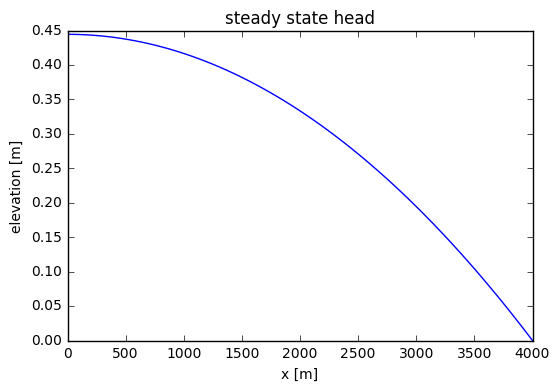

In [98]:
import numpy as np
import matplotlib.pyplot as plt

L  = 20000 # m length of river
kD = 1800. # m2/d
b = 4000. # m,  Width of the aquifer
N1 = 0.05e-3 # m/d, recharge
x = np.linspace(0, b, 100)
h0 = N1 / kD * (b**2 - x**2) # steady head

defaults = { 'xlabel': 'x [m]', 'ylabel':'elevation [m]'}

fig = plt.figure()
ax=fig.add_subplot(111)
ax.set(title='steady state head', **defaults)
ax.plot(x, h0, label='steady mean discharge')
plt.show()

$2$. Assume that the aquifer completely closed at the river. Subtract the average recharge from the actual recharge, so that a pure sine is left over. Then how will the water level in the aquifer vary with time ?

The water level will vary with the amount of water recharged like $dh = N_2\, dt / S_y$

$$ \omega = \frac {2 \pi} {365} $$
$$ t_0 = \frac 4 {12} \times 365 $$
$$ n = N_2 \sin(\omega (t - t_0)) $$
$$ \frac {dh} {dt} = \frac n {S_y} = \frac {N_2} {S_y} \sin( \omega ( t - t_0) ) $$ 
$$ h = \frac {N_2} {\omega {S_y}} \cos(\omega(t - t_0) ) $$

$3$. Generate a fluctuation of the water level at the river that completely counteracts the previous fluctuation in the aquifer, such that the sum is zero. Compute the effect of this fluctuation head boundary in the aquifer and superimpose the result on that of the previous two questions.

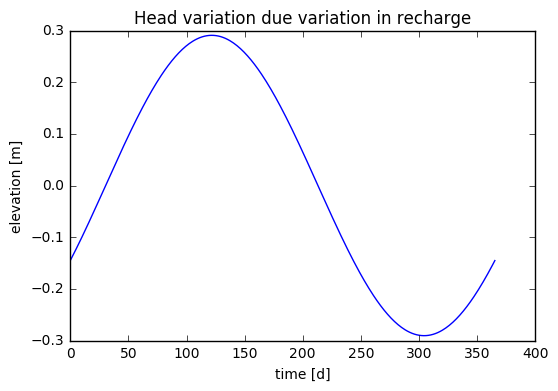

In [99]:
N2    = 1.e-3 # [m/a] recharge amplitude
Sy    = 0.2 #[-] specific yield
aYear = 365.24 # d, days per year
t0    = 4/12. * aYear
omega = 2 * np.pi / aYear
a     = np.sqrt(omega * Sy / (2 * kD))
A     = N2/(omega * Sy)
time  = np.linspace(0., aYear, 365) # d


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel='time [d]', ylabel='elevation [m]', title='Head variation due variation in recharge')
s0     = A * np.cos(omega * (time -t0))
ax.plot(time, s0, label='variation due to variation in recharge')
plt.show()

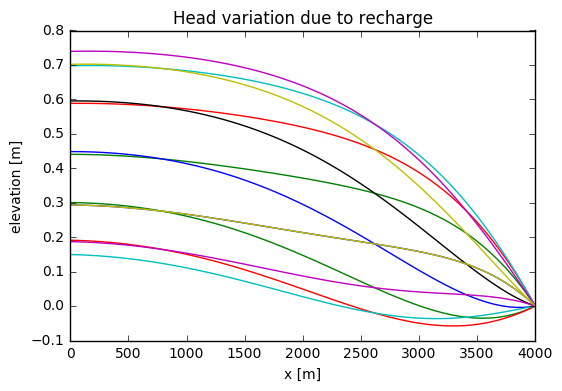

In [100]:
fig  = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel='x [m]', ylabel='elevation [m]', title='Head variation due to recharge')
time = np.linspace(0, aYear, 13)
for t in time:
    s0     = A * np.cos(omega * (t -t0))
    s1     = -A * np.exp(-a * (b - x)) * np.cos(omega * (t - t0) - a * (b - x))
    st     = h0 + s0 + s1
    ax.plot(x, st, label='t={:.3g} d'.format(t))
plt.show()

If everything works well so far, we have superimposed the constant effect of the average recharge + the effect of the remaining fluctuation recharge + the effect of the wave that counteracts the head at the river.

$4$. Now also compute the discharge at the river from these three components.
It's easy to compute the discharge simultaneously with the heads, also step by step and superimpose them.

The discharge to the river is the sum of the components:

h0, the steady component discharge equals $q_{h0} = W\times N_1$

s0, was closed at the river, so $q_{s0} = 0$

s1, yields

$$ s_1     = - \frac {N_2} {\omega S_y} \exp(-a (b - x)) \cos(\omega (t - t_0) - a (b - x)) $$

$$ q_1 = -kD \frac {\partial s_1} {\partial x} |_{x=0} $$

$$ q_1 = - kD \frac {N_2} {\omega S_y} a \exp(- a (b - x)) \left[ \cos(\omega ( t - t_0) - a (b - x)) -
\sin(\omega ( t - t_0) - a (b - x)) \right]
 $$
 
 for $x=b$,
 
 $$ q_1 = - kD \frac {N_2} {\omega S_y} a  \left[ \cos(\omega ( t - t_0)  ) - \sin(\omega ( t - t_0) ) \right]
 $$

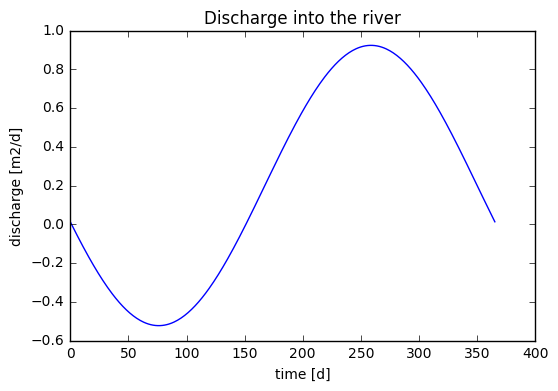

In [101]:
q0 = b * N1
q1 = 0.0
time = np.linspace(0, aYear, 365)
q2 = -kD * A* a * ( np.cos( omega * (time- t0)) - np.sin( omega * (time - t0)) )

qtot = q0 + q1 + q2

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel='time [d]', ylabel='discharge [m2/d]', title='Discharge into the river')
ax.plot(time, qtot)
plt.show()

$5$. Now compute the river discharge at the point where we are by multiplying with the upstream length of the river.

This is just mutiplying by the length of the river

In [102]:
Qriv = L * qtot
#print('River discharge at y = 0 equals',Q)

The total effect till now at the river is a constant river level equal to zero.

$6$. However, the river itself fluctuates in a given way. So generate a wave that matches the fluctuation of the river and compute the head changes due to it in the aquifer.

The effect of the fluctuation of the river is

$$  s_3 = A_r \exp(-a (b- x)) \sin( \omega (t - t_0) - a (b - x)) $$

with $t_0 = 1$ July $= \frac 6 {12} 365$|  and $A_r = 1$ m

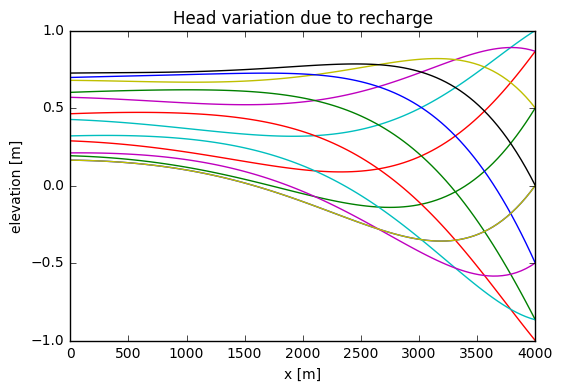

In [103]:

Ar = 1.0 # m river variation
t0 = 6/12 * aYear # 1 July
fig  = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel='x [m]', ylabel='elevation [m]', title='Head variation due to recharge')
time = np.linspace(0, aYear, 13)
for t in time:
    s0     =  A * np.cos(omega * (t -t0))
    s1     = -A * np.exp(-a * (b - x)) * np.cos(omega * (t - t0) - a * (b - x))
    s2      = - Ar * np.exp(-a * (b-x)) * np.sin(omega * (t -t0) - a * (b-x))
    st     = h0 + s0 + s1 + s2
    ax.plot(x, st, label='t={:.3g} d'.format(t))
plt.show()


Also superimpose this effect on everything we had until now. Don't forget the discharge.

$7$. Add the well as specified above. Notice that the well needs to be mirrored over the mountain-boundary and over the river boundary infinite times. So the equation for the well has to be put in a summation.
You may put this in a function for convenience. Let the function accept the necessary variables ($Q, x, y, x_0, y_0$) where $Q$ is the extraction of the well, $x$, $y$ its location, $x_0$, $y_0$ the location of the observation point. When we have this we can compute the drawdown in $x_0, y_0$ caused by the well at $x, y$ extracting a constant flow $Q$ from $t=0$. We can also compute the discharge at this point $x_0$, $y_0$. and its components along the $y$ axis (parallel to the river) and the $x$ axis, perpendicular to the $x$-axis.

The mirror well around the mountain has the same sign as the well
The mirror well around the river has opposite sign as the well.

$$ r_{i,L} = \sqrt { ( (2 i b + x_w )- x_0)^2 + (y_w - y_0)^2}, \,\,\,\, i=0\cdots \infty $$
$$ r_{i,R} = \sqrt { (-(2 i b + x_w) - x_0)^2 + (y_w - y_0^2}, \,\,\,\, i=0\cdots \infty $$

 $$ s = \frac {Q_0} {4 \pi kD} \sum_{i=0}^{\infty} (-1)^i \left[ W\left( \frac {r_{i,L}^2 S} {4 kD t}\right) + W\left( \frac {r_{i,R}^2 S} {4 kD t}\right) \right]$$

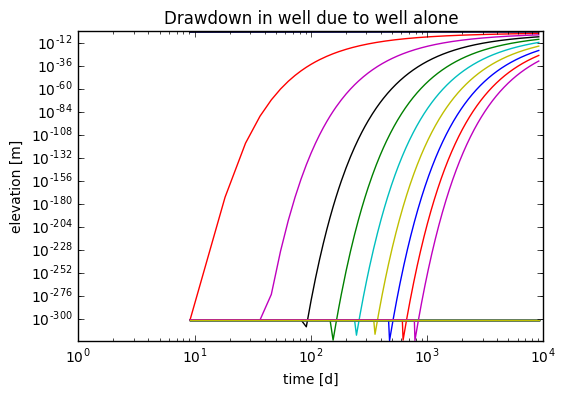

In [122]:
r0 = 0.25 # m (well radius)
xw = b - 2000.  # x of well
yw = 0. # y of well
x0 = xw + r0 # x of observation point
y0 = 0. # y of observation point
Q0 = 1200 # m3/d
time = np.linspace(0, 25*aYear, 1000)
from scipy.special import expi
def W(u): return -expi(-u) # theis well function

s = np.zeros(time[1:].shape)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel='time [d]', ylabel='elevation [m]', title='Drawdown in well due to well alone',  xscale='log', yscale='log')

st = np.zeros(time[1:].shape)
for i in range(20):
    rL2 = ( (2 * i * b + xw) - x0)**2 + (yw-y0)**2
    rR2 = (-(2 * i * b + xw) - x0)**2 + (yw-y0)**2
    uL = rL2 * Sy / (4 * kD * time[1:])
    uR = rR2 * Sy / (4 * kD * time[1:]) 
    s  = Q0/(4 * np.pi * kD) * (-1)**i * ( W(uL) + W(uR) )
    st += s
    ax.plot(time[1:], s)
ax.plot(time[1:], st)
plt.show()

In [120]:
Q0/(4* np.pi* kD) * W(r0**2 * Sy / (4 * kD * 1000))

1.0395153412131515

$8$. Compute the drawdown of the well as a function of time in the well (radius $r_0=0.25$ m), at the mountain range and midway between the well and the river. 

$9$. Show how long it takes to reach steady state at the three mentioned points.

$10.$ Show the discharge or entry flux from the river at $y=0$ as a function of time.

$11$. Compute the flux into/outof the river by average the well alone at 20 points between $-2000<y<2000$ m. Integrate it to get the total flow between $-2000<y<2000$ m into/out of the river due to the well.

$12$. Add this flow to that of the river discharge at $y=0$ without a well to get the total discharge of the river at $y=0$.

$13$. Compute the head in the well (give it a radius $r0 = 0.25$ m), at the mountain range and halfway between the well and the river, all as a function of time.